In [56]:
# tensorflow version
import tensorflow
print(tensorflow.__version__)


2.15.0


In [57]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('/content/aps_data.csv')

<ipython-input-58-c6863e7aafa4>:1: DtypeWarning: Columns (81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/aps_data.csv')


In [59]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [60]:
df.shape

(5000, 171)

In [61]:
df.isnull().sum().sum()

0

In [62]:
# if we look in our data set missing value are replace with na value.
df = df.replace('na',np.nan)

In [63]:
df.isnull().sum().sum()

71649

In [64]:
pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False))

,0
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
...,...
cj_000,38
ci_000,38
bt_000,12
aa_000,0


In [65]:
# filling the values in feature with median of that feature
for feature in [feature for feature in df.columns if feature!='class']:
  df[feature] = df[feature].fillna(df[feature].median())

In [66]:
df.isnull().sum().sum()

0

In [67]:
df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,0.0,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,0.0,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,0.0,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [68]:
X = df.drop('class',axis=1)

In [69]:
y = df['class']
y[0:5]

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

In [70]:
X.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [71]:
y = pd.get_dummies(y,drop_first=True)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [73]:
print(f'shape of X_train : {X_train.shape}')
print(f'shape of X_test : {X_test.shape}')
print(f'shape of y_train : {y_train.shape}')
print(f'shape of y_test : {y_test.shape}')


shape of X_train : (4000, 170)
shape of X_test : (1000, 170)
shape of y_train : (4000, 1)
shape of y_test : (1000, 1)


In [74]:
# we have to scale the data because to converge fast
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# building ann model
# importing necessary libraries.
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [76]:
classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=170))
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))




In [77]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                1710      
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1831 (7.15 KB)
Trainable params: 1831 (7.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model_history = classifier.fit(X_train,y_train,batch_size=10,epochs=20)

Epoch 1/20
400/400 [==============================] - 2s 3ms/step - loss: 0.4171 - accuracy: 0.9097
Epoch 2/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0655 - accuracy: 0.9835
Epoch 3/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9883
Epoch 4/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0293 - accuracy: 0.9912
Epoch 5/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9910
Epoch 6/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0212 - accuracy: 0.9927
Epoch 7/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 8/20
400/400 [==============================] - 1s 3ms/step - loss: 0.0168 - accuracy: 0.9952
Epoch 9/20
400/400 [==============================] - 2s 4ms/step - loss: 0.0151 - accuracy: 0.9950
Epoch 10/20
400/400 [==============================] - 2s 4ms/step - loss: 0.0141 - accuracy: 0.9940

In [80]:
model_history.history.keys()

dict_keys(['loss', 'accuracy'])

In [81]:
model_history = classifier.fit(X_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0048 - accuracy: 0.9980 - val_loss: 0.0058 - val_accuracy: 0.9970
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.9983 - val_loss: 0.0065 - val_accuracy: 0.9970
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9983 - val_loss: 0.0079 - val_accuracy: 0.9960
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0124 - val_accuracy: 0.9950
Epoch 5/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.0114 - val_accuracy: 0.9950
Epoch 6/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0151 - val_accuracy: 0.9940
Epoch 7/30
300/300 [==============================] - 1s 5ms/step - loss: 0.0033 - accuracy: 0.9987 - val_loss: 0.0158 - val_accuracy: 0.9940
Epoch 

In [82]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [83]:
model_history.history['accuracy']

[0.9980000257492065,
 0.9983333349227905,
 0.9983333349227905,
 0.9983333349227905,
 0.9983333349227905,
 0.9993333220481873,
 0.9986666440963745,
 0.9993333220481873,
 0.9993333220481873,
 0.9990000128746033,
 0.999666690826416,
 1.0,
 0.999666690826416,
 0.999666690826416,
 1.0,
 1.0,
 0.9980000257492065,
 0.9976666569709778,
 0.9980000257492065,
 0.9993333220481873,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

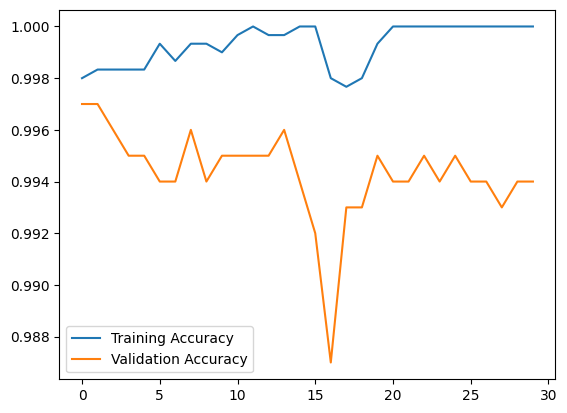

In [84]:
plt.plot(model_history.history['accuracy'],label='Training Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.show()

In [85]:
y_pred = classifier.predict(X_test)

32/32 [==============================] - 0s 1ms/step


In [86]:
y_pred = y_pred>0.5

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(y_test,y_pred)

array([[981,   5],
       [  5,   9]])

In [89]:
# hyperparameter tuning with keras tuner.
!pip install keras-tuner --upgrade

In [90]:
from kerastuner.tuners import RandomSearch


In [91]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu', input_dim=170))
    model.add(Dense(units=32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
    optimizer = hp.Choice("optimizer", values=['adam', 'sgd', 'rmsprop', 'adadelta'])

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5,directory='project',
                     project_name='aps-fault')
tuner.search(X_train,y_train,validation_data=(X_test,y_test),epochs=5)


Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.9890000224113464

Best val_accuracy So Far: 0.9919999837875366
Total elapsed time: 00h 00m 30s


In [92]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [93]:
best_model = tuner.get_best_models(num_models=1)[0]

In [94]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6561 (25.63 KB)
Trainable params: 6561 (25.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [95]:
from tensorflow.keras import optimizers

# Define the Model:

def build_model(hp):
  model = Sequential()
  model.add(Dense(units=hp.Int('units',min_value=32,max_value=512,step=32),
                  activation='relu'))
  model.add(Dense(units=1,activation='sigmoid'))
  model.compile(optimizers.Adam(hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                loss='binary_crossentropy',metrics=['accuracy'])

  return model

# Instantiate the Tuner:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5, # The maximum number of hyperparameter combinations to try.
    directory='my_tuner_dir',
    project_name='my_tuner_project'
)

# Search for the Best Hyperparameters:
# Perform the search for the best hyperparameters using the 'search' method.
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Get the Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f'Best HyperParameters : {best_hps.values}\n')

# we can use best_hps to build and train the final model with the chosen hyperparameters.
final_model = tuner.hypermodel.build(best_hps)
final_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the Final Model
eval_result = final_model.evaluate(X_test, y_test)
print("Test accuracy:", eval_result[1])


Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.9929999709129333

Best val_accuracy So Far: 0.9940000176429749
Total elapsed time: 00h 00m 31s
Best HyperParameters : {'units': 32, 'learning_rate': 0.01}

Epoch 1/10
125/125 [==============================] - 1s 4ms/step - loss: 0.1320 - accuracy: 0.9737 - val_loss: 0.0657 - val_accuracy: 0.9780
Epoch 2/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0410 - val_accuracy: 0.9920
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9890 - val_loss: 0.0496 - val_accuracy: 0.9910
Epoch 4/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0253 - accuracy: 0.9912 - val_loss: 0.0522 - val_accuracy: 0.9900
Epoch 5/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0206 - accuracy: 0.9930 - val_loss: 0.0547 - val_accuracy: 0.9890
Epoch 6/10
125/125 [==============================] - 1s 5ms/step - loss: 0.0179 - accu

In [96]:
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                5472      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5505 (21.50 KB)
Trainable params: 5505 (21.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
